In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

400

In [4]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'bagels'
location = 'Hoboken'
SEARCH_LIMIT = 20

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagels = requests.get(url, headers=headers, params=url_params)

In [5]:
print(response_bagels)

<Response [200]>


In [6]:
# print(response_bagels.text)

In [7]:
bagels = response_bagels.text

In [8]:
bagels = json.loads(bagels)
print(type(bagels))

<class 'dict'>


In [9]:
# bagels

In [10]:
for key in bagels.keys():
    print(key)

businesses
total
region


In [12]:
bagels['businesses'][0]

{'id': 'ue0fG3vQkKpa9HheKVZFvA',
 'alias': 'levend-bagelry-boston-2',
 'name': 'Levend Bagelry',
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/0YTeRWCB7o1ELlgSwkXpXw/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/levend-bagelry-boston-2?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA',
 'review_count': 94,
 'categories': [{'alias': 'bagels', 'title': 'Bagels'},
  {'alias': 'bakeries', 'title': 'Bakeries'}],
 'rating': 4.0,
 'coordinates': {'latitude': 42.3619511, 'longitude': -71.057115},
 'transactions': ['delivery'],
 'price': '$',
 'location': {'address1': '100 Hanover St',
  'address2': '',
  'address3': None,
  'city': 'Boston',
  'zip_code': '02108',
  'country': 'US',
  'state': 'MA',
  'display_address': ['100 Hanover St', 'Boston, MA 02108']},
 'phone': '+16179456123',
 'display_phone': '(617) 945-6123',
 'distance': 1964.3340646289942}

In [14]:
bagels['total']

1100

In [15]:
bagels['region']

{'center': {'longitude': -71.07124328613281, 'latitude': 42.34784169448538}}

In [10]:
#making the bagels dictionary a dataframe
bagels_df = pd.DataFrame.from_dict(bagels['businesses'])

In [11]:
bagels_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [12]:
df = bagels_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']]

In [13]:
df

,name,rating,review_count,price,location
0,O'Bagel,3.5,431,$,"{'address1': '600 Washington St', 'address2': ..."
1,Bagels On The Hudson,2.5,309,$,"{'address1': '802 Washington St', 'address2': ..."
2,Hoboken Hot Bagels,3.5,210,$,"{'address1': '634 Washington St', 'address2': ..."
3,JP's Bagel Express,3.5,179,$,"{'address1': '52 Newark St', 'address2': '', '..."
4,Hidden Grounds Coffee,4.0,56,$$,"{'address1': '700 Garden St', 'address2': '', ..."
5,Black Rail Coffee,4.5,150,$,"{'address1': '800 Jackson St', 'address2': Non..."
6,The Little Grocery,3.5,97,$$,"{'address1': '1212 Washington St', 'address2':..."
7,Hidden Grounds Coffee,4.0,162,$,"{'address1': '79 Hudson St', 'address2': None,..."
8,Alessio's Cafe | Gelato | Pizza,4.5,76,NaN,"{'address1': '539 Park Ave', 'address2': None,..."
9,Boogie Woogie Bagel Boys,3.0,13,$,"{'address1': '1200 Harbor Blvd', 'address2': '..."


In [14]:
df = df.sort_values('rating', ascending = False)
df

,name,rating,review_count,price,location
11,Bagel,5.0,2,NaN,"{'address1': '1445 John F Kennedy Blvd', 'addr..."
13,Cafe Panino Mucho Giusto,4.5,121,$$,"{'address1': '551 Hudson St', 'address2': '', ..."
5,Black Rail Coffee,4.5,150,$,"{'address1': '800 Jackson St', 'address2': Non..."
8,Alessio's Cafe | Gelato | Pizza,4.5,76,NaN,"{'address1': '539 Park Ave', 'address2': None,..."
15,Blackstone Coffee Roasters,4.5,114,$$,"{'address1': '502 Hudson St', 'address2': '', ..."
18,Rosticeria Da Gigi,4.0,225,$$,"{'address1': '916 Washington St', 'address2': ..."
17,GFG Bakery Cafe,4.0,149,$$,"{'address1': '221 River St', 'address2': '', '..."
4,Hidden Grounds Coffee,4.0,56,$$,"{'address1': '700 Garden St', 'address2': '', ..."
7,Hidden Grounds Coffee,4.0,162,$,"{'address1': '79 Hudson St', 'address2': None,..."
14,Little Market,4.0,33,$,"{'address1': '400 Newark St', 'address2': None..."


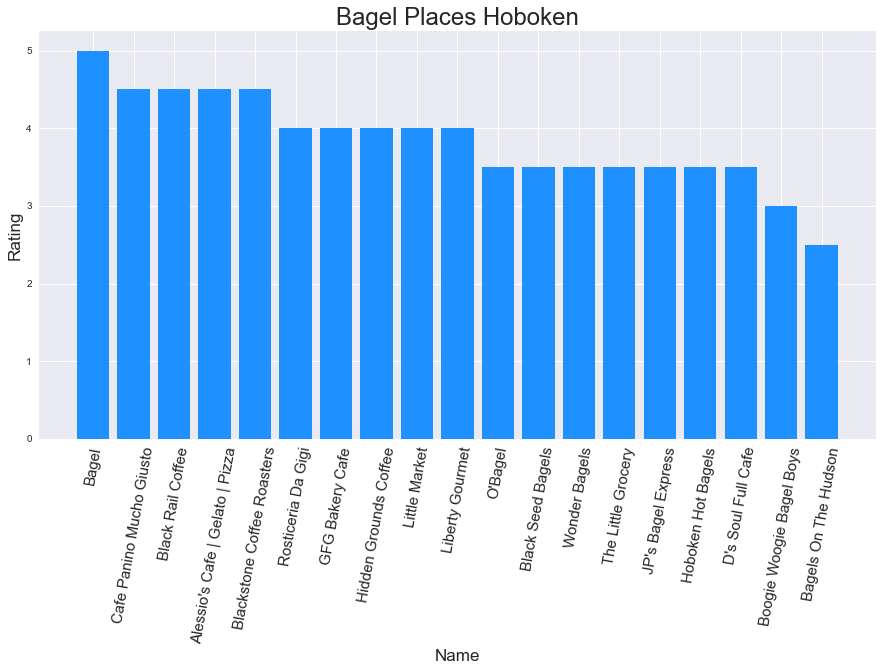

In [16]:
fig, ax = plt.subplots(figsize = (15,7.5))
x = df['name'][:25]
y = df['rating'][:25]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Bagel Places Hoboken', fontsize = 24)
plt.xticks(rotation=80, fontsize = 15)
ax.bar(x,y, color = 'dodgerblue')

# plt.savefig('../data/Hoboken_Bagels')

In [5]:
# MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'coffee'
location = 'Boston'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_coffee = requests.get(url, headers=headers, params=url_params)

In [6]:
response_coffee

<Response [200]>

In [7]:
coffee = response_coffee.text

In [8]:
json.loads(coffee)

{'businesses': [{'id': 'rXxC_ZH58EItO3m5PASzEA',
   'alias': 'render-coffee-boston',
   'name': 'Render Coffee',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/WCM6v1mrr8d5N_ql7OqRHg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/render-coffee-boston?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA',
   'review_count': 502,
   'categories': [{'alias': 'cafes', 'title': 'Cafes'},
    {'alias': 'coffee', 'title': 'Coffee & Tea'}],
   'rating': 4.5,
   'coordinates': {'latitude': 42.34115, 'longitude': -71.08149},
   'transactions': ['delivery'],
   'price': '$',
   'location': {'address1': '563 Columbus Ave',
    'address2': '',
    'address3': '',
    'city': 'Boston',
    'zip_code': '02118',
    'country': 'US',
    'state': 'MA',
    'display_address': ['563 Columbus Ave', 'Boston, MA 02118']},
   'phone': '+16172624142',
   'display_phone': '(617) 262-4142',
   'distance'

In [9]:
for key in json.loads(coffee).keys():
    print(key)

businesses
total
region


In [10]:
coffee_df = pd.DataFrame.from_dict(json.loads(coffee)['businesses'])

In [11]:
coffee_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,rXxC_ZH58EItO3m5PASzEA,render-coffee-boston,Render Coffee,https://s3-media4.fl.yelpcdn.com/bphoto/WCM6v1...,False,https://www.yelp.com/biz/render-coffee-boston?...,502,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",4.5,"{'latitude': 42.34115, 'longitude': -71.08149}",[delivery],$,"{'address1': '563 Columbus Ave', 'address2': '...",+16172624142,(617) 262-4142,1127.217052
1,e4r0wRKY_iNdmDffnV0ntw,ogawa-coffee-boston-2,Ogawa Coffee,https://s3-media4.fl.yelpcdn.com/bphoto/KhV3Kt...,False,https://www.yelp.com/biz/ogawa-coffee-boston-2...,571,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 42.3568572843331, 'longitude': -7...","[delivery, pickup]",$$,"{'address1': '10 Milk St', 'address2': '', 'ad...",+16177807139,(617) 780-7139,1474.820314
2,06feX4qEHFMcPZsiWtvYfw,thinking-cup-boston-5,Thinking Cup,https://s3-media2.fl.yelpcdn.com/bphoto/QKyY2_...,False,https://www.yelp.com/biz/thinking-cup-boston-5...,818,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 42.351734691006, 'longitude': -71...",[delivery],$$,"{'address1': '85 Newbury St', 'address2': '', ...",+16172473333,(617) 247-3333,516.679758
3,943fBDjPbEE600gMhQH9og,gracenote-coffee-boston-6,Gracenote Coffee,https://s3-media1.fl.yelpcdn.com/bphoto/aMII38...,False,https://www.yelp.com/biz/gracenote-coffee-bost...,181,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,"{'latitude': 42.3515995758639, 'longitude': -7...",[delivery],$,"{'address1': '108 Lincoln St', 'address2': '',...",,,1155.708291
4,RjIpiZLefONlg4SfWUjirg,flour-bakery-café-boston-5,Flour Bakery + Café,https://s3-media2.fl.yelpcdn.com/bphoto/bMjSN-...,False,https://www.yelp.com/biz/flour-bakery-caf%C3%A...,1039,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 42.3482569197856, 'longitude': -7...","[delivery, pickup]",$$,"{'address1': '131 Clarendon St', 'address2': '...",+16174377700,(617) 437-7700,217.223243
5,iiDu_dHw-uB6kR_hVthKEw,jaho-coffee-roaster-and-wine-bar-boston,Jaho Coffee Roaster & Wine Bar,https://s3-media2.fl.yelpcdn.com/bphoto/EvZocP...,False,https://www.yelp.com/biz/jaho-coffee-roaster-a...,365,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",4.0,"{'latitude': 42.35183, 'longitude': -71.06322}","[delivery, pickup]",$$,"{'address1': '665 Washington St', 'address2': ...",+18572334094,(857) 233-4094,789.225483
6,e6WA4_4-4SzEzAHPsn7VNQ,cafe-madeleine-boston-2,Cafe Madeleine,https://s3-media2.fl.yelpcdn.com/bphoto/vewKj-...,False,https://www.yelp.com/biz/cafe-madeleine-boston...,278,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,"{'latitude': 42.3420690000057, 'longitude': -7...",[delivery],$$,"{'address1': '517 Columbus Ave', 'address2': '...",+18572398052,(857) 239-8052,963.146411
7,YPMMkUSAvZX4K-JsUbREyQ,thinking-cup-boston-2,Thinking Cup,https://s3-media1.fl.yelpcdn.com/bphoto/uq8aFb...,False,https://www.yelp.com/biz/thinking-cup-boston-2...,1173,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.0,"{'latitude': 42.3539, 'longitude': -71.06372}",[delivery],$$,"{'address1': '165 Tremont St', 'address2': '',...",+16174825555,(617) 482-5555,919.623889
8,y5lCCZ4YZk4jLSmBaATOmw,polcaris-coffee-boston,Polcari's Coffee,https://s3-media4.fl.yelpcdn.com/bphoto/H2lpbW...,False,https://www.yelp.com/biz/polcaris-coffee-bosto...,183,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",5.0,"{'latitude': 42.36401, 'longitude': -71.0555}",[delivery],$$,"{'address1': '105 Salem St', 'address2': '', '...",+16172270786,(617) 227-0786,2215.128244
9,9uYa1bl3ajS0R9bRraNkbw,tradesman-coffee-shop-and-lounge-boston,Tradesman Coffee Shop & Lounge,https://s3-media2.fl.yelpcdn.com/bphoto/56thL9...,False,https://www.yelp.com/biz/tradesman-coffee-shop...,153,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,"{'latitude': 42.35738, 'longitude': -71.05345}",[],$$,"{'address1': '58 Batterymarch St', 'address

In [12]:
df_coffee = coffee_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

In [13]:
df_coffee

,name,rating,review_count,price,location
16,Solid Ground Cafe,5.0,60,NaN,"{'address1': '742 Huntington Ave', 'address2':..."
8,Polcari's Coffee,5.0,183,$$,"{'address1': '105 Salem St', 'address2': '', '..."
27,Third Cliff Bakery,5.0,21,NaN,"{'address1': '3531 Washington St', 'address2':..."
36,"Greystone Cafe, Bakery, and Provisions",5.0,17,NaN,"{'address1': '123 Appleton St', 'address2': ''..."
22,Cafe Bonjour,5.0,156,$$,"{'address1': '55 Temple Pl', 'address2': '', '..."
17,Phinista,5.0,69,NaN,"{'address1': '96 Peterborough St', 'address2':..."
31,Lulu Green,5.0,36,$$,"{'address1': '246 W Broadway', 'address2': Non..."
43,Mike & Patty's - Boston,4.5,1778,$,"{'address1': '12 Church St', 'address2': '', '..."
18,The Bittersweet Shoppe on Newbury,4.5,16,NaN,"{'address1': '257 Newbury St', 'address2': Non..."
35,Honeycomb Cafe,4.5,74,$,"{'address1': '107-109 Savin Hill Ave', 'addres..."


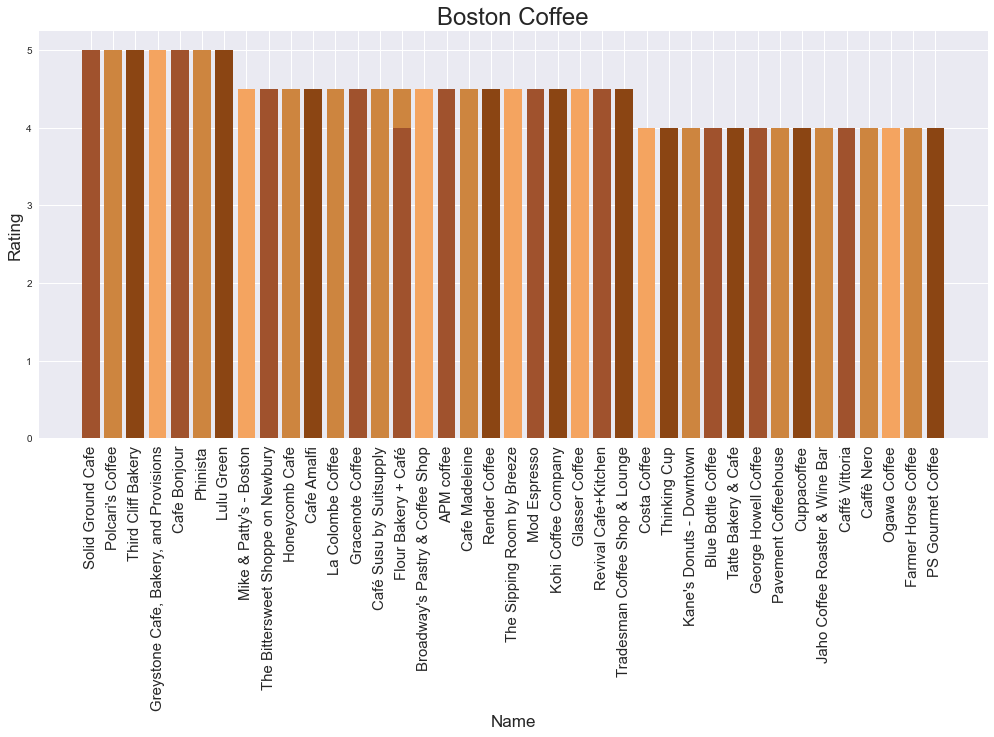

In [27]:
fig, ax = plt.subplots(figsize = (17,7.5))
x = df_coffee['name'][:47]
y = df_coffee['rating'][:47]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Boston Coffee', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
ax.bar(x,y, color = ['sienna', 'peru', 'saddlebrown', 'sandybrown'])

plt.savefig('../data/BostonCoffee_namerating')

In [6]:
term = 'museum'
location = 'Boston'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
museum_response = requests.get(url, headers=headers, params=url_params)

In [7]:
museum = json.loads(museum_response.text)

In [23]:
type(museum_response.text)

str

In [8]:
museum

{'businesses': [{'id': '8xuUthCjEwYO-40S7FPMqQ',
   'alias': 'museum-of-fine-arts-boston',
   'name': 'Museum Of Fine Arts',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/ebFDYgWz8J1yyf1fhJ4Rqg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/museum-of-fine-arts-boston?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA',
   'review_count': 798,
   'categories': [{'alias': 'artmuseums', 'title': 'Art Museums'}],
   'rating': 4.5,
   'coordinates': {'latitude': 42.339383, 'longitude': -71.094043},
   'transactions': [],
   'location': {'address1': '465 Huntington Ave',
    'address2': '',
    'address3': '',
    'city': 'Boston',
    'zip_code': '02115',
    'country': 'US',
    'state': 'MA',
    'display_address': ['465 Huntington Ave', 'Boston, MA 02115']},
   'phone': '+16172679300',
   'display_phone': '(617) 267-9300',
   'distance': 2096.6311671620056},
  {'id': 'cPyQFwnQN

In [9]:
museum.keys()

dict_keys(['businesses', 'total', 'region'])

In [11]:
museum_df = pd.DataFrame.from_dict(json.loads(museum_response.text)['businesses'])

In [12]:
museum = museum_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

In [13]:
museum.head(5)

,name,rating,review_count,price,location
49,Agassiz Bridge,5.0,1,NaN,"{'address1': '', 'address2': '', 'address3': '..."
37,Blue Hill Observatory Science Center,5.0,5,NaN,"{'address1': '1 Observatory Service Rd', 'addr..."
16,McMullen Museum of Art,5.0,4,NaN,"{'address1': '2101 Commonwealth Ave', 'address..."
26,The Sports Museum,5.0,8,NaN,"{'address1': '100 Legends Way', 'address2': ''..."
27,Harvard Museum of the Ancient Near East,5.0,8,NaN,"{'address1': '6 Divinity Ave', 'address2': '',..."


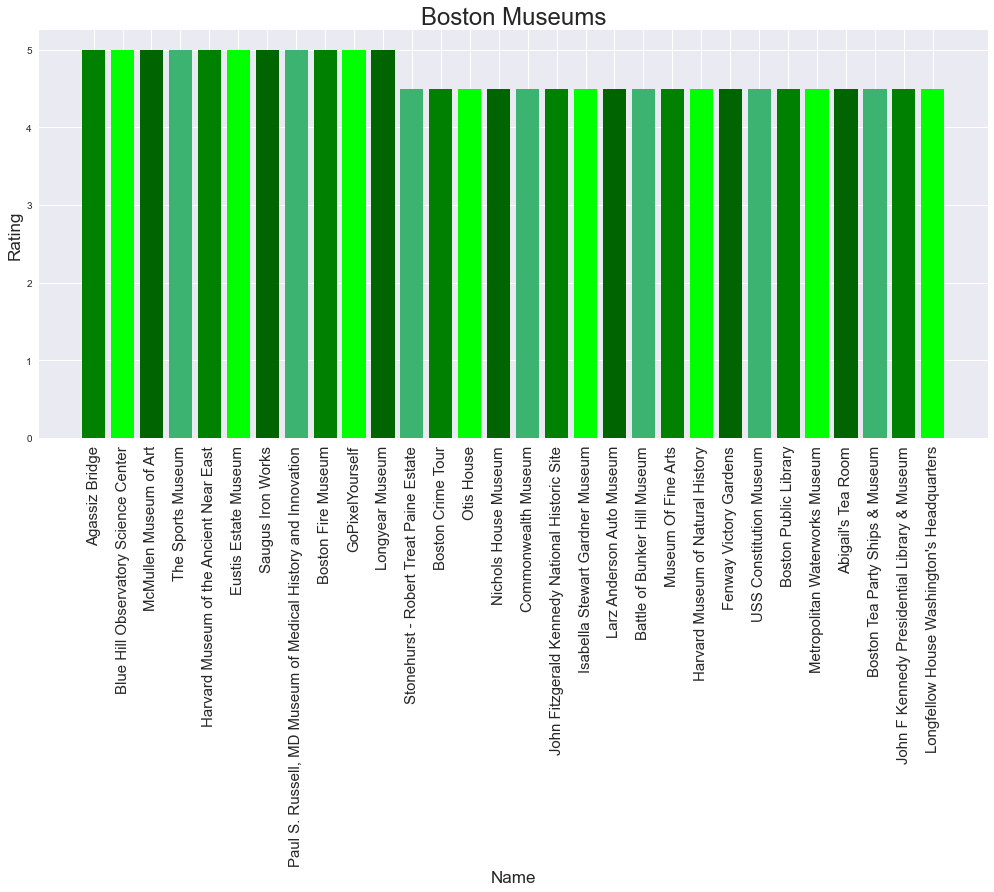

In [20]:
fig, ax = plt.subplots(figsize = (17,7.5))
x = museum['name'][:30]
y = museum['rating'][:30]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Boston Museums', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
ax.bar(x,y, color = ['green', 'lime', 'darkgreen', 'mediumseagreen'])

plt.savefig('../data/BostoMuseum_namerating')

In [7]:
term = 'bathroom'
location = 'Boston'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
bathroom_response = requests.get(url, headers=headers, params=url_params)

In [8]:
bathroom = json.loads(bathroom_response.text)

In [9]:
bathroom_df = pd.DataFrame.from_dict(json.loads(bathroom_response.text)['businesses'])

In [11]:
bathroom = bathroom_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

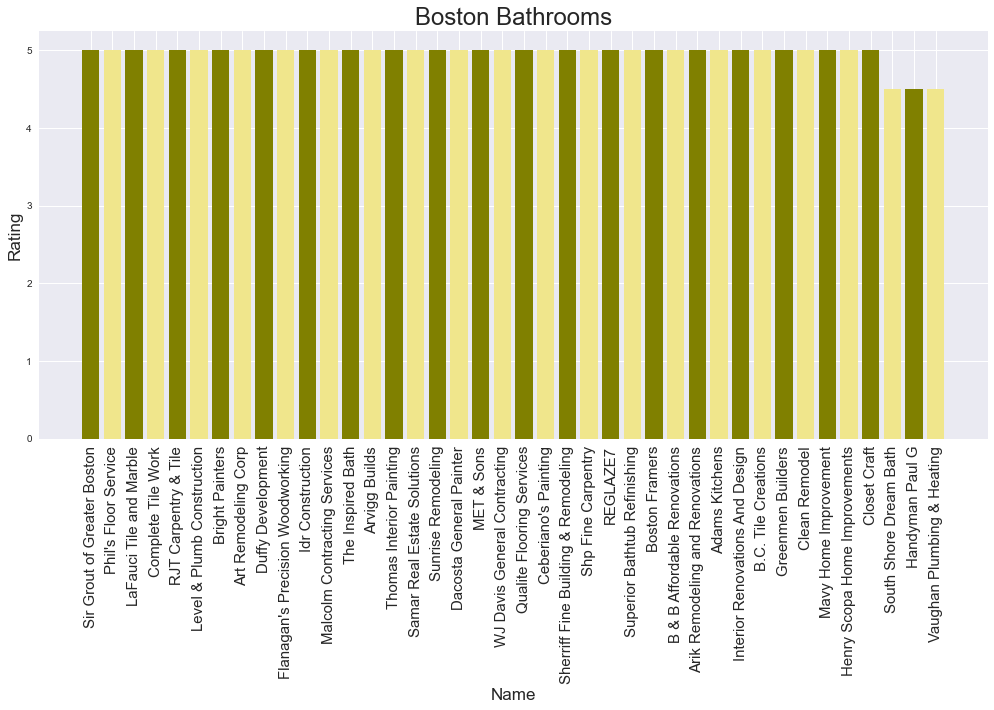

In [14]:
fig, ax = plt.subplots(figsize = (17,7.5))
x = bathroom['name'][:40]
y = bathroom['rating'][:40]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Boston Bathrooms', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
ax.bar(x,y, color = ['olive', 'khaki'])

plt.savefig('../data/BostonBathroom_namerating')

In [28]:
term = 'outdoor activities'
location = 'Boston'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
outdoor_response = requests.get(url, headers=headers, params=url_params)

In [29]:
outdoor = json.loads(outdoor_response.text)

In [30]:
outdoor = pd.DataFrame.from_dict(outdoor['businesses'])

In [31]:
outdoor = outdoor.loc[:,['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

In [32]:
outdoor

,name,rating,review_count,price,location
29,BKBX,5.0,7,NaN,"{'address1': '211 Western Ave', 'address2': No..."
5,Youth Enrichment Services,5.0,3,NaN,"{'address1': '412 Massachusetts Ave', 'address..."
26,Titus Sparrow Park,5.0,7,NaN,"{'address1': 'West Newton At Columbus', 'addre..."
1,Arnold Arboretum,5.0,307,NaN,"{'address1': '125 Arborway', 'address2': '', '..."
35,Hummingbird Bridal and Events,5.0,22,NaN,"{'address1': None, 'address2': None, 'address3..."
21,Outside The Box Festival,5.0,8,NaN,"{'address1': 'Boston Common', 'address2': '', ..."
41,Outdoor Explorations,5.0,1,NaN,"{'address1': '98 Winchester St', 'address2': '..."
16,Cycleboat Boston,5.0,9,NaN,"{'address1': '1 8th St', 'address2': None, 'ad..."
42,New England Princess Parties - Kids Parties Bo...,5.0,7,NaN,"{'address1': '', 'address2': None, 'address3':..."
49,Chestnut Hill Reservoir,4.5,74,NaN,"{'address1': '400 Chestnut Hill Ave', 'address..."


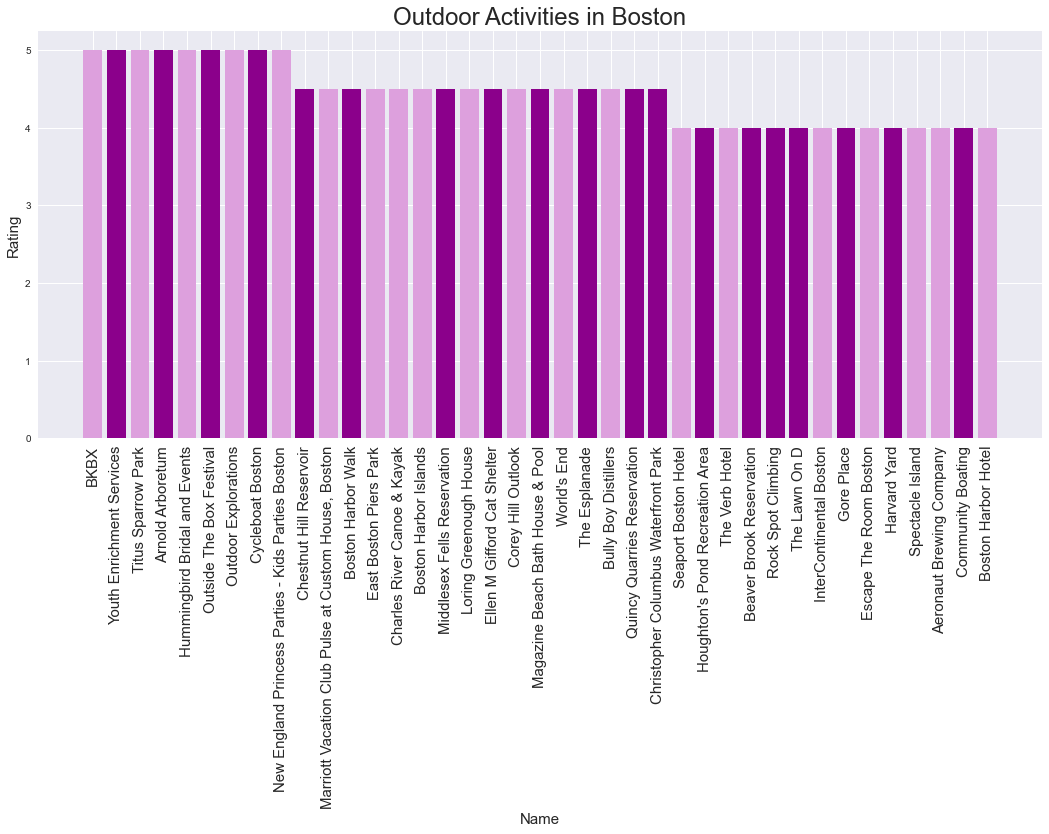

In [45]:
fig, ax = plt.subplots(figsize = (18, 7.5))
x = outdoor['name'][:41]
y = outdoor['rating'][:41]
ax.set_xlabel('Name', fontsize = 15)
ax.set_ylabel('Rating', fontsize = 15)
ax.set_title('Outdoor Activities in Boston', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
plt.bar(x,y, color = ['plum', 'darkmagenta'])

plt.savefig('../data/BostonOutdoor_namerating')

In [42]:
outdoor.reset_index()

,index,name,rating,review_count,price,location
0,29,BKBX,5.0,7,NaN,"{'address1': '211 Western Ave', 'address2': No..."
1,5,Youth Enrichment Services,5.0,3,NaN,"{'address1': '412 Massachusetts Ave', 'address..."
2,26,Titus Sparrow Park,5.0,7,NaN,"{'address1': 'West Newton At Columbus', 'addre..."
3,1,Arnold Arboretum,5.0,307,NaN,"{'address1': '125 Arborway', 'address2': '', '..."
4,35,Hummingbird Bridal and Events,5.0,22,NaN,"{'address1': None, 'address2': None, 'address3..."
5,21,Outside The Box Festival,5.0,8,NaN,"{'address1': 'Boston Common', 'address2': '', ..."
6,41,Outdoor Explorations,5.0,1,NaN,"{'address1': '98 Winchester St', 'address2': '..."
7,16,Cycleboat Boston,5.0,9,NaN,"{'address1': '1 8th St', 'address2': None, 'ad..."
8,42,New England Princess Parties - Kids Parties Bo...,5.0,7,NaN,"{'address1': '', 'address2': None, 'address3':..."
9,49,Chestnut Hill Reservoir,4.5,74,NaN,"{'address1': '400 Chestnut Hill Ave', 'address..."
